In [ ]:
!pip install -U accelerate
!pip install evaluate
!pip install jiwer
!pip install --upgrade transformers bitsandbytes datasets torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
from tqdm.notebook import tqdm

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


JSON

In [ ]:
!pip install ijson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 15.2 MB/s eta 0:00:00


In [ ]:
import ijson

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"
samples_per_language = 20

language_map = {
    "Hindi": "Hindi",
    "Bengali": "Bengali",
    "English": "English"
}

language_samples = {
    "Hindi": [],
    "Bengali": [],
    "English": []
}

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang_raw = meta.get("assertLanguage", "").strip()
        lang = language_map.get(lang_raw)

        if lang and len(language_samples[lang]) < samples_per_language:
            audio_url = item.get("file_url")
            image_path = meta.get("imageFileName")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                language_samples[lang].append((audio_url, image_url))

        if all(len(v) == samples_per_language for v in language_samples.values()):
            break

for lang, samples in language_samples.items():
    print(f"\n {lang.upper()} SAMPLES")
    for idx, (audio, image) in enumerate(samples, 1):
        print(f"{idx:02d}.  Audio: {audio}")
        print(f"     Image: {image}\n")

print("\n 20 samples for English, Hindi, and Bangla.")


 ===== HINDI SAMPLES =====
01.  Audio: https://vaani.iisc.ac.in/Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12210177_APVDA_74648_12858_17702.wav
     Image: https://vaani.iisc.ac.in/Images/IISc_VaaniProject_GENERIC_0485.jpg

02.  Audio: https://vaani.iisc.ac.in/Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12208376_APVDAF_171820_10601_20579.wav
     Image: https://vaani.iisc.ac.in/Images/IISc_VaaniProject_GENERIC_0463.jpg

03.  Audio: https://vaani.iisc.ac.in/Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12201527_APCTDAF_173707_0_10680.wav
     Image: https://vaani.iisc.ac.in/Images/IISc_VaaniProject_GENERIC_0473.jpg

04.  Audio: https://vaani.iisc.ac.in/Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12205992_KTCMFLM_300562_9112_18373.wav
     Image: https://vaani.iisc.ac.in/Images/IISc_VaaniProject_GENERIC_0524.jpg

05.  Audio: https://vaani.iisc.ac.in/Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12212954_APVDM_2

In [ ]:
import ijson
from collections import defaultdict

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"

subset_language_counts = defaultdict(lambda: defaultdict(int))

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})

        audio_url = item.get("file_url", "")
        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        lang = meta.get("assertLanguage", "").strip()
        if lang:
            subset_language_counts[subset][lang] += 1

for subset, lang_counts in subset_language_counts.items():
    print(f"\n=== Subset: {subset} ===")
    for lang, count in lang_counts.items():
        print(f"  Language: {lang:<10} | Samples: {count}")



=== Subset: Aurangabad ===
  Language: Marathi    | Samples: 51638
  Language: Hindi      | Samples: 45090
  Language: Bengali    | Samples: 57
  Language: Telugu     | Samples: 63

=== Subset: Solapur ===
  Language: Marathi    | Samples: 108624
  Language: Hindi      | Samples: 21331
  Language: Maithili   | Samples: 77
  Language: Malvani    | Samples: 57
  Language: Bengali    | Samples: 78
  Language: Kannada    | Samples: 169

=== Subset: Gopalganj ===
  Language: Hindi      | Samples: 98014
  Language: Bhojpuri   | Samples: 16537
  Language: Maithili   | Samples: 903
  Language: Bengali    | Samples: 104
  Language: Marathi    | Samples: 179

=== Subset: Jahanabad ===
  Language: Hindi      | Samples: 59346
  Language: Maithili   | Samples: 1198
  Language: Magahi     | Samples: 9144
  Language: Bengali    | Samples: 245
  Language: Marathi    | Samples: 303
  Language: Urdu       | Samples: 477

=== Subset: Balrampur ===
  Language: Hindi      | Samples: 69072
  Language: Chha

**Marathi test data download**

In [ ]:
import ijson
import os
import csv
import requests
from tqdm import tqdm

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"
subset_target = "Solapur"
language_target = "Marathi"
max_samples = 5000

output_audio_dir = "/content/drive/MyDrive/VaaniTestData/VaaniSolapur-ma/Audio"
output_image_dir = "/content/drive/MyDrive/VaaniTestData/VaaniSolapur-ma/Image"
os.makedirs(output_audio_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)

csv_output = "/content/drive/MyDrive/VaaniTestData/VaaniSolapur-ma/marathi_solapur_5000.csv"

samples = []

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang = meta.get("assertLanguage", "").strip()
        audio_url = item.get("file_url", "")

        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        if lang == language_target and subset == subset_target:
            image_path = meta.get("imageFileName", "")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                samples.append((audio_url, image_url))
            if len(samples) >= max_samples:
                break

def download_file(url, dest_folder):
    filename = url.split("/")[-1]
    dest_path = os.path.join(dest_folder, filename)
    if not os.path.exists(dest_path):
        try:
            response = requests.get(url, stream=True, timeout=10)
            if response.status_code == 200:
                with open(dest_path, 'wb') as f:
                    for chunk in response.iter_content(1024):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    return dest_path

rows = []
for audio_url, image_url in tqdm(samples, desc="Downloading files"):
    audio_path = download_file(audio_url, output_audio_dir)
    image_path = download_file(image_url, output_image_dir)
    rows.append([audio_path, image_path])

with open(csv_output, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "image_path"])
    writer.writerows(rows)

print(f"\n Done. Saved {len(rows)} samples and metadata CSV to: {csv_output}")


 Done. Saved 5000 samples and metadata CSV to: /content/drive/MyDrive/VaaniTestData/VaaniSolapur-ma/marathi_solapur_5000.csv


Hindi test data download

In [ ]:
import ijson
import os
import csv
import requests
from tqdm import tqdm

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"
subset_target = "Gopalganj"
language_target = "Hindi"
max_samples = 5000

output_audio_dir = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/Audio"
output_image_dir = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/Image"
os.makedirs(output_audio_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)

csv_output = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/hindi_gopalganj_5000.csv"

samples = []

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang = meta.get("assertLanguage", "").strip()
        audio_url = item.get("file_url", "")

        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        if lang == language_target and subset == subset_target:
            image_path = meta.get("imageFileName", "")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                samples.append((audio_url, image_url))
            if len(samples) >= max_samples:
                break

def download_file(url, dest_folder):
    filename = url.split("/")[-1]
    dest_path = os.path.join(dest_folder, filename)
    if not os.path.exists(dest_path):
        try:
            response = requests.get(url, stream=True, timeout=10)
            if response.status_code == 200:
                with open(dest_path, 'wb') as f:
                    for chunk in response.iter_content(1024):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    return dest_path

rows = []
for audio_url, image_url in tqdm(samples, desc="Downloading files"):
    audio_path = download_file(audio_url, output_audio_dir)
    image_path = download_file(image_url, output_image_dir)
    rows.append([audio_path, image_path])

with open(csv_output, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "image_path"])
    writer.writerows(rows)

print(f"\n Done. Saved {len(rows)} samples and metadata CSV to: {csv_output}")


 Done. Saved 5000 samples and metadata CSV to: /content/drive/MyDrive/VaaniTestData/Gopalganj-hi/hindi_gopalganj_5000.csv


**Urdu test data download**

In [ ]:
import ijson
import os
import csv
import requests
from tqdm import tqdm

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"
subset_target = "Anantpur"
language_target = "Urdu"
max_samples = 5000

output_audio_dir = "/content/drive/MyDrive/VaaniTestData/Anantpur-ur/Audio"
output_image_dir = "/content/drive/MyDrive/VaaniTestData/Anantpur-ur/Image"
os.makedirs(output_audio_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)

csv_output = "/content/drive/MyDrive/VaaniTestData/Anantpur-ur/urdu_anantpur_5000.csv"

samples = []

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang = meta.get("assertLanguage", "").strip()
        audio_url = item.get("file_url", "")

        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        if lang == language_target and subset == subset_target:
            image_path = meta.get("imageFileName", "")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                samples.append((audio_url, image_url))
            if len(samples) >= max_samples:
                break

def download_file(url, dest_folder):
    filename = url.split("/")[-1]
    dest_path = os.path.join(dest_folder, filename)
    if not os.path.exists(dest_path):
        try:
            response = requests.get(url, stream=True, timeout=10)
            if response.status_code == 200:
                with open(dest_path, 'wb') as f:
                    for chunk in response.iter_content(1024):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    return dest_path

rows = []
for audio_url, image_url in tqdm(samples, desc="Downloading files"):
    audio_path = download_file(audio_url, output_audio_dir)
    image_path = download_file(image_url, output_image_dir)
    rows.append([audio_path, image_path])

with open(csv_output, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "image_path"])
    writer.writerows(rows)

print(f"\n Done. Saved {len(rows)} samples and metadata CSV to: {csv_output}")


 Done. Saved 5000 samples and metadata CSV to: /content/drive/MyDrive/VaaniTestData/Anantpur-ur/urdu_anantpur_5000.csv


**Telugu test data download**

In [ ]:
import ijson
import os
import csv
import requests
from tqdm import tqdm

input_file = "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json"
subset_target = "Krishna"
language_target = "Telugu"
max_samples = 5000


output_audio_dir = "/content/drive/MyDrive/VaaniTestData/Krishna-te/Audio"
output_image_dir = "/content/drive/MyDrive/VaaniTestData/Krishna-te/Image"
os.makedirs(output_audio_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)

csv_output = "/content/drive/MyDrive/VaaniTestData/Krishna-te/telugu_Krishna_5000.csv"

samples = []

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang = meta.get("assertLanguage", "").strip()
        audio_url = item.get("file_url", "")

        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        if lang == language_target and subset == subset_target:
            image_path = meta.get("imageFileName", "")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                samples.append((audio_url, image_url))
            if len(samples) >= max_samples:
                break


def download_file(url, dest_folder):
    filename = url.split("/")[-1]
    dest_path = os.path.join(dest_folder, filename)
    if not os.path.exists(dest_path):
        try:
            response = requests.get(url, stream=True, timeout=10)
            if response.status_code == 200:
                with open(dest_path, 'wb') as f:
                    for chunk in response.iter_content(1024):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    return dest_path

rows = []
for audio_url, image_url in tqdm(samples, desc="Downloading files"):
    audio_path = download_file(audio_url, output_audio_dir)
    image_path = download_file(image_url, output_image_dir)
    rows.append([audio_path, image_path])

with open(csv_output, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "image_path"])
    writer.writerows(rows)

print(f"\n Done. Saved {len(rows)} samples and metadata CSV to: {csv_output}")


 Done. Saved 5000 samples and metadata CSV to: /content/drive/MyDrive/VaaniTestData/Krishna-te/telugu_Krishna_5000.csv


**translate hindi_gopalganj data**

In [ ]:
import os
import torch
import pandas as pd
import librosa
from PIL import Image
from tqdm import tqdm
from math import ceil
from collections import defaultdict
from transformers import (
    AutoProcessor, AutoModelForCausalLM,
    WhisperProcessor, WhisperForConditionalGeneration
)
from sentence_transformers import SentenceTransformer, util

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
csv_path = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/hindi_gopalganj_5000.csv"
save_path = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/gopalganj_trans_caption_all_whisper.csv"
language_code = "hi"
whisper_model_sizes = ["tiny", "base", "small", "medium", "large"]
batch_size = 16

git_processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
git_model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco").to(device)

similarity_model = SentenceTransformer("all-MiniLM-L6-v2").to(device)

df = pd.read_csv(csv_path)
metadata_map = {}
merged_results = defaultdict(dict)

print("\n Captioning images in batches...")
num_batches = ceil(len(df) / batch_size)
for batch_idx in tqdm(range(num_batches), desc="GIT Captioning"):
    start = batch_idx * batch_size
    end = min(start + batch_size, len(df))
    batch_df = df.iloc[start:end]

    image_paths = batch_df["image_path"].tolist()
    audio_paths = batch_df["audio_path"].tolist()
    images = []

    for path in image_paths:
        try:
            img = Image.open(path).convert("RGB")
            images.append(img)
        except:
            images.append(None)

    valid_entries = [(a, i, img) for a, i, img in zip(audio_paths, image_paths, images) if img is not None]
    if not valid_entries:
        continue

    a_paths_valid, i_paths_valid, imgs_valid = zip(*valid_entries)

    try:
        pixel_values = git_processor(images=list(imgs_valid), return_tensors="pt").pixel_values.to(device)
        with torch.no_grad():
            generated_ids = git_model.generate(pixel_values=pixel_values, max_length=50)
        captions = git_processor.batch_decode(generated_ids, skip_special_tokens=True)
    except Exception as e:
        print(f" GIT batch failed: {e}")
        continue

    for a_path, i_path, cap in zip(a_paths_valid, i_paths_valid, captions):
        metadata_map[a_path] = {
            "audio_path": a_path,
            "image_path": i_path,
            "caption": cap
        }

for model_size in whisper_model_sizes:
    print(f"\n Running Whisper-{model_size}...")

    model_name = f"openai/whisper-{model_size}"
    whisper_processor = WhisperProcessor.from_pretrained(model_name)
    whisper_model = WhisperForConditionalGeneration.from_pretrained(model_name).to(device)
    forced_decoder_ids = whisper_processor.get_decoder_prompt_ids(language=language_code, task="translate")

    num_batches = ceil(len(df) / batch_size)
    for batch_idx in tqdm(range(num_batches), desc=f"Whisper-{model_size}"):
        start = batch_idx * batch_size
        end = min(start + batch_size, len(df))
        batch_df = df.iloc[start:end]

        audio_paths = batch_df["audio_path"].tolist()
        audio_arrays = []

        for path in audio_paths:
            try:
                arr, _ = librosa.load(path, sr=16000)
                audio_arrays.append(arr)
            except:
                audio_arrays.append(None)

        valid_entries = [(p, a) for p, a in zip(audio_paths, audio_arrays) if a is not None]
        if not valid_entries:
            continue

        a_paths_valid, arrays_valid = zip(*valid_entries)

        try:
            inputs = whisper_processor(
                arrays_valid,
                sampling_rate=16000,
                return_tensors="pt",
                padding=True
            ).to(device)

            with torch.no_grad():
                output = whisper_model.generate(
                    input_features=inputs.input_features,
                    forced_decoder_ids=forced_decoder_ids,
                    max_length=100
                )

            transcriptions = whisper_processor.batch_decode(output, skip_special_tokens=True)

            captions = [metadata_map[p]["caption"] for p in a_paths_valid]
            emb_trans = similarity_model.encode(transcriptions, convert_to_tensor=True)
            emb_caps = similarity_model.encode(captions, convert_to_tensor=True)
            similarities = util.pytorch_cos_sim(emb_trans, emb_caps).diagonal().cpu().tolist()

            for path, trans, sim in zip(a_paths_valid, transcriptions, similarities):
                merged_results[path][f"{model_size}_transcription"] = trans
                merged_results[path][f"{model_size}_similarity"] = sim

        except Exception as e:
            print(f" Whisper-{model_size} batch failed: {e}")

print("\n Saving results...")
final_results = []
for audio_path, meta in metadata_map.items():
    entry = dict(meta)
    entry.update(merged_results.get(audio_path, {}))
    final_results.append(entry)

df_out = pd.DataFrame(final_results)
df_out.to_csv(save_path, index=False)
print(f"\n All results saved to: {save_path}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


 Captioning images in batches...


GIT Captioning: 100%|██████████| 313/313 [37:11<00:00,  7.13s/it]



 Running Whisper-tiny...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

Whisper-tiny: 100%|██████████| 313/313 [1:25:29<00:00, 16.39s/it]



 Running Whisper-base...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

Whisper-base: 100%|██████████| 313/313 [06:19<00:00,  1.21s/it]



 Running Whisper-small...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

Whisper-small: 100%|██████████| 313/313 [10:24<00:00,  2.00s/it]



 Running Whisper-medium...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

Whisper-medium: 100%|██████████| 313/313 [25:10<00:00,  4.82s/it]



 Running Whisper-large...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

Whisper-large: 100%|██████████| 313/313 [44:53<00:00,  8.61s/it]



 Saving results...

 All results saved to: /content/drive/MyDrive/VaaniTestData/Gopalganj-hi/gopalganj_trans_caption_all_whisper.csv


**Download Muzaffar hindi Training part**

In [ ]:
import os
import csv
import ijson
import requests
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

!cp "/content/drive/MyDrive/VaaniTestData/Vaani_IIsc_Artpark_Full_Data.json" /content/
input_file = "/content/Vaani_IIsc_Artpark_Full_Data.json"

subset_target = "Muzaffar"
language_target = "Hindi"
base_dir = "/content/drive/MyDrive/VaaniTrainData/Muzaffar-hi"
audio_dir = os.path.join(base_dir, "Audio")
image_dir = os.path.join(base_dir, "Image")
csv_path = os.path.join(base_dir, "Muzaffar_hindi_all.csv")

os.makedirs(audio_dir, exist_ok=True)
os.makedirs(image_dir, exist_ok=True)

samples = []

with open(input_file, 'r', encoding='utf-8') as f:
    parser = ijson.items(f, 'item')
    for item in parser:
        meta = item.get("metadata", {})
        lang = meta.get("assertLanguage", "").strip()
        audio_url = item.get("file_url", "")
        if "/Audios/" in audio_url:
            subset = audio_url.split("/Audios/")[1].split("/")[0]
        else:
            continue

        if lang == language_target and subset == subset_target:
            image_path = meta.get("imageFileName", "")
            if audio_url and image_path:
                image_url = f"https://vaani.iisc.ac.in/{image_path}"
                samples.append((audio_url, image_url))

print(f" Found {len(samples)} Hindi-Muzaffar samples.")

def download_file(url, dest_folder):
    filename = url.split("/")[-1]
    dest_path = os.path.join(dest_folder, filename)
    if not os.path.exists(dest_path):
        try:
            r = requests.get(url, stream=True, timeout=15)
            if r.status_code == 200:
                os.makedirs(dest_folder, exist_ok=True)
                with open(dest_path, 'wb') as f:
                    for chunk in r.iter_content(1024):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    return dest_path

def download_pair(pair):
    audio_url, image_url = pair
    audio_path = download_file(audio_url, audio_dir)
    image_path = download_file(image_url, image_dir)
    return [audio_path, image_path]

print(" Downloading with threads...")

with ThreadPoolExecutor(max_workers=8) as executor:
    rows = list(tqdm(executor.map(download_pair, samples), total=len(samples)))

with open(csv_path, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "image_path"])
    writer.writerows(rows)

print(f"\n Done. Saved {len(rows)} Hindi-Muzaffar samples to: {csv_path}")

 Found 18327 Hindi-Muzaffar samples.


100%|██████████| 18327/18327 [59:21<00:00,  5.15it/s]



 Done. Saved 18327 Hindi-Muzaffar samples to: /content/drive/MyDrive/VaaniTrainData/Muzaffar-hi/Muzaffar_hindi_all.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Training**

In [ ]:
!cp -r /content/drive/MyDrive/backup_strim /content/strim

In [ ]:
#!git clone https://github.com/danoneata/strim.git
%cd strim
!pip install -e .

/content/strim
Obtaining file:///content/strim
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00
  Running setup.py develop for strim


In [ ]:
!mkdir -p data/muzaffarpur-hi/train/images
!mkdir -p data/muzaffarpur-hi/train/audio
!mkdir -p data/muzaffarpur-hi/dev/images
!mkdir -p data/muzaffarpur-hi/dev/audio

In [ ]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm

src_dir = "/content/drive/MyDrive/VaaniTrainData/Muzaffar-hi/Audio"
dst_dir = "/content/strim/data/muzaffarpur-hi/train/audio"
os.makedirs(dst_dir, exist_ok=True)

def copy_file(filename):
    src = os.path.join(src_dir, filename)
    dst = os.path.join(dst_dir, filename)
    try:
        shutil.copy2(src, dst)
        return True
    except Exception as e:
        print(f" Failed to copy {filename}: {e}")
        return False

files = os.listdir(src_dir)
total = len(files)

with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(executor.map(copy_file, files))

print(f" Copied {sum(results)}/{total} audio files.")

 Copied 18327/18327 audio files.


In [ ]:
import os
import shutil
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor

src_dir = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/Audio"
dst_dir = "/content/strim/data/muzaffarpur-hi/dev/audio"
os.makedirs(dst_dir, exist_ok=True)

def copy_file(filename):
    src = os.path.join(src_dir, filename)
    dst = os.path.join(dst_dir, filename)
    try:
        shutil.copy2(src, dst)
        return True
    except Exception as e:
        print(f" Failed to copy {filename}: {e}")
        return False

files = os.listdir(src_dir)
total = len(files)

with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(executor.map(copy_file, files))

print(f" Copied {sum(results)}/{total} audio files.")

 Copied 5000/5000 audio files.


In [ ]:
!cp /content/drive/MyDrive/VaaniTestData/Gopalganj-hi/Image/* data/muzaffarpur-hi/dev/images/
!cp /content/drive/MyDrive/VaaniTrainData/Muzaffar-hi/Image/* data/muzaffarpur-hi/train/images/

In [ ]:
import os

aud_path = "/content/strim/data/muzaffarpur-hi/train/audio/IISc_VaaniProject_M_BR_Muzaffar_Vive28600_1327450000_pic_228_8895_19712.wav"
img_path = "/content/strim/data/muzaffarpur-hi/train/images/IISc_VaaniProject_GENERIC_0272.jpg"
print(os.path.exists(aud_path))
print(os.path.exists(img_path))

True
True


In [ ]:
import pandas as pd
import os

# === PATHS ===
train_input_csv = "/content/drive/MyDrive/VaaniTrainData/Muzaffar-hi/Muzaffar_hindi_all.csv"
test_input_csv = "/content/drive/MyDrive/VaaniTestData/Gopalganj-hi/gopalganj_trans_caption_all_whisper.csv"

train_output_csv = "/content/strim/data/muzaffarpur-hi/train.csv"
test_output_csv = "/content/strim/data/muzaffarpur-hi/dev.csv"

train_df = pd.read_csv(train_input_csv)

train_df = train_df.dropna(subset=["audio_path", "image_path"])

train_df["audio"] = train_df["audio_path"].apply(lambda x: f"train/audio/{os.path.basename(x)}")
train_df["image"] = train_df["image_path"].apply(lambda x: f"train/images/{os.path.basename(x)}")

train_df[["audio", "image"]].to_csv(train_output_csv, index=False)
print(f" Saved train.csv with {len(train_df)} rows")

test_df = pd.read_csv(test_input_csv)

test_df = test_df.dropna(subset=["audio_path", "image_path", "caption"])

test_df["audio"] = test_df["audio_path"].apply(lambda x: f"dev/audio/{os.path.basename(x)}")
test_df["image"] = test_df["image_path"].apply(lambda x: f"dev/images/{os.path.basename(x)}")
test_df["caption"] = test_df["caption"].astype(str).fillna("")

test_df[["audio", "image", "caption"]].to_csv(test_output_csv, index=False)
print(f" Saved dev.csv with {len(test_df)} rows")

 Saved train.csv with 18327 rows
 Saved test.csv with 5000 rows


In [ ]:
import os
os.makedirs("/content/strim/output/image-captioner", exist_ok=True)
os.makedirs("/content/strim/output/audio-features", exist_ok=True)

In [ ]:
from tqdm.notebook import tqdm
!python /content/strim/strim/scripts/run_image_captioner.py -m blip-base -d muzaffarpur-hi --split train

In [ ]:
from tqdm.notebook import tqdm
!python /content/strim/strim/scripts/run_image_captioner.py -m blip-base -d muzaffarpur-hi --split dev

2025-05-17 21:06:35.528657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747515995.574931   82693 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747515995.587724   82693 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-17 21:06:35.633034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` w

In [ ]:
from tqdm.notebook import tqdm
!python /content/strim/strim/scripts/extract_audio_features.py --split train

2025-05-18 09:02:14.528623: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 09:02:14.546259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747558934.567781   62587 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747558934.575566   62587 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 09:02:14.597671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
from tqdm.notebook import tqdm
!python /content/strim/strim/scripts/extract_audio_features.py -m wav2vec2-xls-r-2b -d muzaffarpur-hi --split dev

2025-05-18 09:00:01.122456: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 09:00:01.139896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747558801.161051   61974 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747558801.167542   61974 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 09:00:01.188658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
!python strim/audio_to_text/cross_attention/train.py -c muzaffarpur-hi-blip-base

2025-05-18 17:11:46.272320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747588306.295389  192832 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747588306.302355  192832 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
{'loss': 3.0226, 'grad_norm': 1.0541884899139404, 'learning_rate': 9.897558070279929e-05, 'epoch': 1.0}
{'loss': 2.318, 'grad_norm': 1.4088387489318848, 'learning_rate': 9.556283502084574e-05, 'epoch': 2.0}
{'loss': 2.1245, 'grad_norm': 1.4813600778579712, 'learning_rate': 9.21500893388922e-05, 'epoch': 3.0}
{'loss': 2.031, 'grad_norm': 1.4467970132827759, 'learning_rate': 8.873734365693865e-05, 'epoch': 4.0}
{'loss': 1.9666, 'grad_n

In [ ]:
!python strim/audio_to_text/cross_attention/predict.py -c muzaffarpur-hi-blip-base -p muzaffarpur-hi-final

2025-05-18 19:39:34.141655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747597174.171752  232335 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747597174.181523  232335 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
 Sample structure: {'key-image': 'IISc_VaaniProject_GENERIC_0485', 'text': 'a woman is working on a machine in a room.', 'path-audio': 'data/muzaffarpur-hi/dev/audio/IISc_VaaniProject_S_Bihar_Gopalganj_120464_12210177_APVDA_74648_12858_17702.wav', 'path-image': 'data/muzaffarpur-hi/dev/images/IISc_VaaniProject_GENERIC_0485.jpg'}
Loading checkpoint shards: 100% 2/2 [00:00<00:00,  4.04it/s]
100% 5000/5000 [18:22<00:00,  4.54it/s]
 Pred

In [ ]:
!pip install sacrebleu
!python strim/scripts/show_bleu_metrics.py

Evaluating 5000 samples with randomized references

num_refs: 1 · BLEU: 2.92 ± 0.2
num_refs: 2 · BLEU: 5.42 ± 0.3
num_refs: 3 · BLEU: 7.27 ± 0.3
num_refs: 4 · BLEU: 8.78 ± 0.0
num_refs: 5 · BLEU: 9.93 ± 0.0


In [ ]:
!pip install sacrebleu rouge-score nltk bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.9 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=aadd7529a60b1530d62814a1a2d555a0bee6ef10c5f759fa2135c5dc22fb9afe
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Evaluation Results
ROUGE-1       : 0.216
ROUGE-L       : 0.207
METEOR        : 0.132
BERTScore-F1  : 0.884


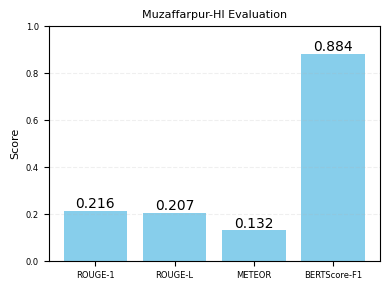

In [ ]:
import json
import numpy as np
import nltk
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import single_meteor_score
from bert_score import score as bert_score

nltk.download('wordnet')
nltk.download('omw-1.4')

def remove_punct(text):
    return text.strip().replace(".", "").replace(",", "").replace("?", "").replace("!", "")

def load_preds_refs(json_path, num_refs=1):
    with open(json_path, "r") as f:
        data = json.load(f)
    preds = [remove_punct(d["text-prediction"]) for d in data]
    refs = [[remove_punct(r) for r in d["reference-captions"][:num_refs]] for d in data]
    return preds, refs

def compute_rouge(preds, refs):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1, rougeL = [], []
    for pred, refset in zip(preds, refs):
        scores = scorer.score(pred, refset[0])
        rouge1.append(scores["rouge1"].fmeasure)
        rougeL.append(scores["rougeL"].fmeasure)
    return np.mean(rouge1), np.mean(rougeL)

def compute_meteor(preds, refs):
    return np.mean([
        single_meteor_score(refs[i][0].split(), preds[i].split())
        for i in range(len(preds))
    ])

def compute_bertscore(preds, refs):
    flattened_refs = [r[0] for r in refs]
    P, R, F1 = bert_score(preds, flattened_refs, lang="en", verbose=False)
    return float(F1.mean())

def evaluate_all_metrics(json_path):
    preds, refs = load_preds_refs(json_path)
    r1, rL = compute_rouge(preds, refs)
    meteor = compute_meteor(preds, refs)
    bert = compute_bertscore(preds, refs)

    metrics = {
        "ROUGE-1": r1,
        "ROUGE-L": rL,
        "METEOR": meteor,
        "BERTScore-F1": bert
    }

    print(" Evaluation Results")
    for k, v in metrics.items():
        print(f"{k:<14}: {v:.3f}")

    return metrics

def plot_metric_bars(metrics_dict, title="Evaluation Metrics"):
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    plt.figure(figsize=(4, 3))
    bars = plt.bar(names, values, color='skyblue')
    plt.ylim(0, 1)
    plt.ylabel("Score", fontsize=8)
    plt.title(title, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f"{val:.3f}", ha='center')

    plt.grid(True, axis='y', linestyle='--', alpha=0.2)
    plt.tight_layout()
    plt.show()

json_path = "output/audio-to-text-mapper/predictions/muzaffarpur-hi-blip-base-muzaffarpur-hi-final.json"
metrics = evaluate_all_metrics(json_path)
plot_metric_bars(metrics, title="Muzaffarpur-HI Evaluation")

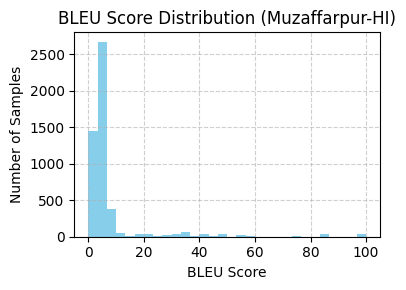

In [ ]:
import json
import matplotlib.pyplot as plt
from sacrebleu import sentence_bleu

path = "output/audio-to-text-mapper/predictions/muzaffarpur-hi-blip-base-muzaffarpur-hi-final.json"
with open(path, "r") as f:
    data = json.load(f)

bleu_scores = []
for item in data:
    pred = item["text-prediction"]
    ref = [item["reference-captions"][0]]
    score = sentence_bleu(pred, ref).score
    bleu_scores.append(score)

plt.figure(figsize=(4, 3))
plt.hist(bleu_scores, bins=30, color='skyblue')
plt.title("BLEU Score Distribution (Muzaffarpur-HI)")
plt.xlabel("BLEU Score")
plt.ylabel("Number of Samples")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


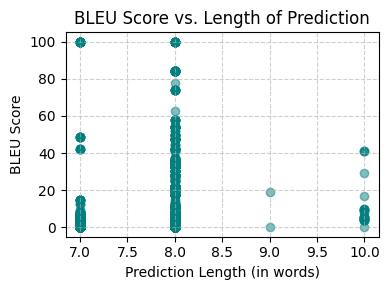

In [ ]:
lengths = [len(item["text-prediction"].split()) for item in data]
plt.figure(figsize=(4, 3))
plt.scatter(lengths, bleu_scores, alpha=0.5, color="teal")
plt.title("BLEU Score vs. Length of Prediction")
plt.xlabel("Prediction Length (in words)")
plt.ylabel("BLEU Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
!mkdir -p /content/drive/MyDrive/strim/model-hi
!cp -r /content/strim/output/audio-to-text-mapper/muzaffarpur-hi-blip-base/final/* /content/drive/MyDrive/strim/model-hi

In [ ]:
import torch
torch.cuda.empty_cache()

In [7]:
import nbformat

path = "/content/drive/MyDrive/Colab Notebooks/train-hindi.ipynb"
output = "/content/drive/MyDrive/Colab Notebooks/train-hindi.ipynb"

with open(path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

nb.metadata.pop("widgets", None)

with open(output, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(" Cleaned and ready:", output)


 Cleaned and ready: /content/drive/MyDrive/Colab Notebooks/train-hindi.ipynb
